## Best Subset Selection
Predicting a Baseball players Salary based on prior seasons performance

In [1]:
#Import ISLR library
library(ISLR)
fix(Hitters)

Warning message:
"package 'ISLR' was built under R version 3.6.1"

In [2]:
#Columns of data
names(Hitters)

[1] "AtBat"     "Hits"      "HmRun"     "Runs"      "RBI"       "Walks"    
 [7] "Years"     "CAtBat"    "CHits"     "CHmRun"    "CRuns"     "CRBI"     
[13] "CWalks"    "League"    "Division"  "PutOuts"   "Assists"   "Errors"   
[19] "Salary"    "NewLeague"

In [3]:
#Shape of data
dim(Hitters)

[1] 322  20

In [4]:
#To call players with missing salary data
sum(is.na(Hitters$Salary))

[1] 59

In [5]:
#Remove rows with missing values
Hitters=na.omit(Hitters)
dim(Hitters)

[1] 263  20

In [6]:
sum(is.na(Hitters))

[1] 0

In [7]:
#Install leaps package
install.packages("leaps")

Installing package into 'C:/Users/Watson Turbo/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'leaps' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Watson Turbo\AppData\Local\Temp\Rtmpyu2ery\downloaded_packages


In [8]:
library(leaps)

Warning message:
"package 'leaps' was built under R version 3.6.1"

In [9]:
#Perform best subset selection given # of predictors using RSS
#Note: regsubsets() only reports up to an 8 variable model
regfit.full=regsubsets(Salary~.,Hitters)
summary(regfit.full)

Subset selection object
Call: regsubsets.formula(Salary ~ ., Hitters)
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 ) " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2  ( 1 ) " "   "*"  " "   " "  " " " "   

<b>Asterisk indicates variable is included in model<b>

In [10]:
#nvmax to order more variables
regfit.full=regsubsets(Salary~.,data=Hitters,nvmax=19)
reg.summary=summary(regfit.full)

In [11]:
names(reg.summary)

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

In [12]:
#To return R^2
reg.summary$rsq

[1] 0.3214501 0.4252237 0.4514294 0.4754067 0.4908036 0.5087146 0.5141227
 [8] 0.5285569 0.5346124 0.5404950 0.5426153 0.5436302 0.5444570 0.5452164
[15] 0.5454692 0.5457656 0.5459518 0.5460945 0.5461159

<b>R^2 with 1 variable = 32%
    
 
R^2 with All variables = 55%<b>

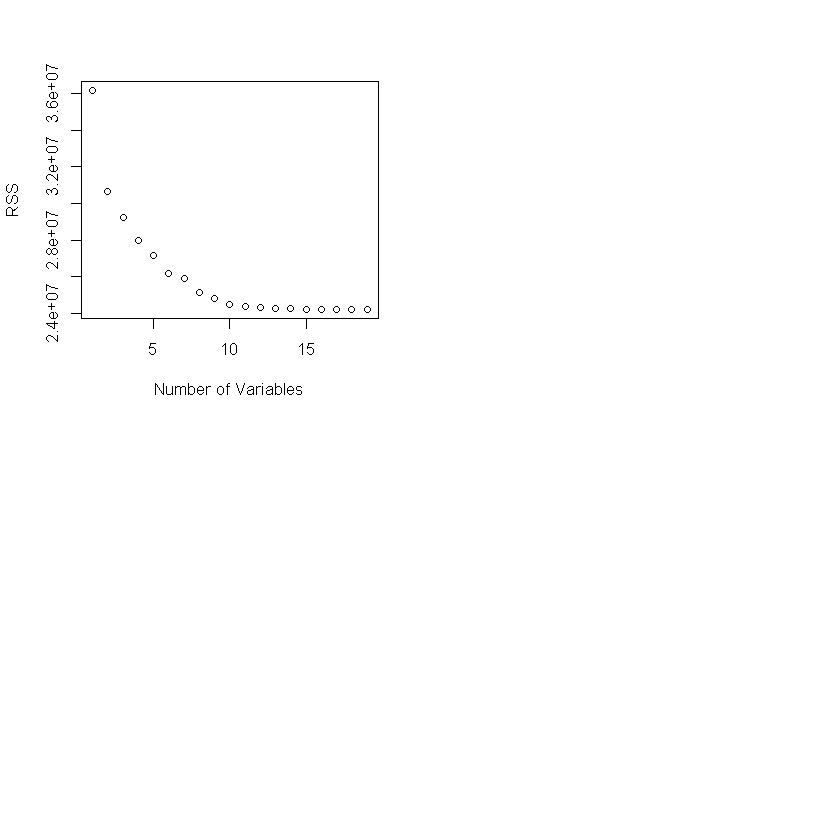

In [18]:
#Plot RSS, adjusted R^2, Cp, and BIC for all models at once
#Type=1 connects the plotted points with lines
#Type isn't working for this graph. Maybe RSS?
par(mfrow=c(2,2))
plot(reg.summary$rss,xlab="Number of Variables",ylab="RSS")

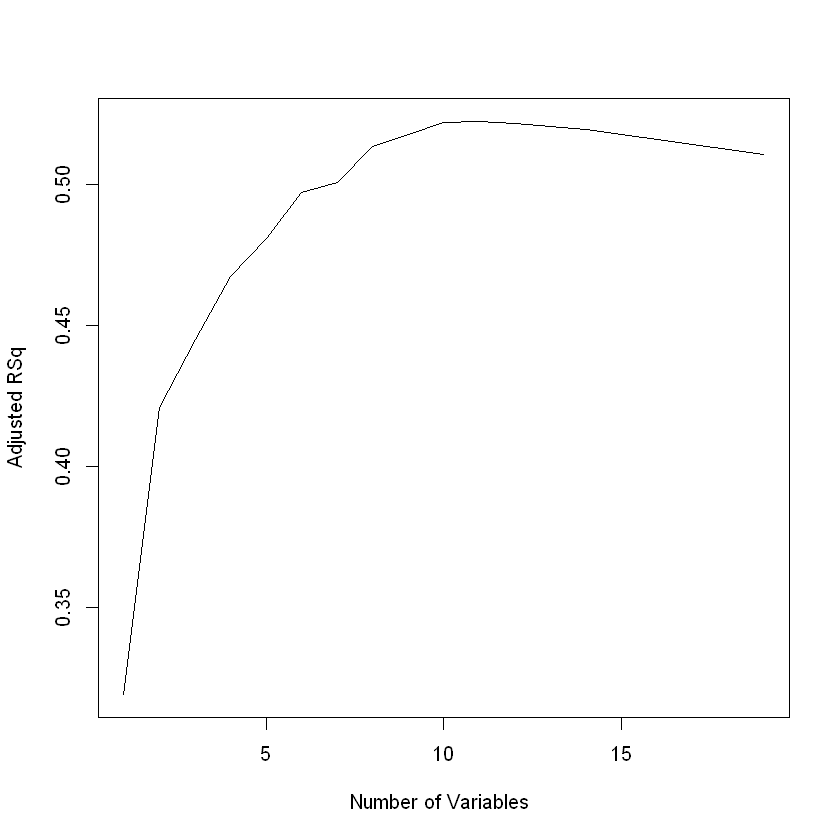

In [19]:
plot(reg.summary$adjr2 ,xlab="Number of Variables ", ylab="Adjusted RSq",type="l")

In [20]:
#points() command puts points on a plot that was already created
#which.max() used to identify the location of max point of a vector
which.max(reg.summary$adjr2)

[1] 11

In [22]:
#red dot to indicate model with largest adjusted R^2
points(11,reg.summary$adjr2[11], col="red",cex=2,pch=20)

ERROR: Error in plot.xy(xy.coords(x, y), type = type, ...): plot.new has not been called yet


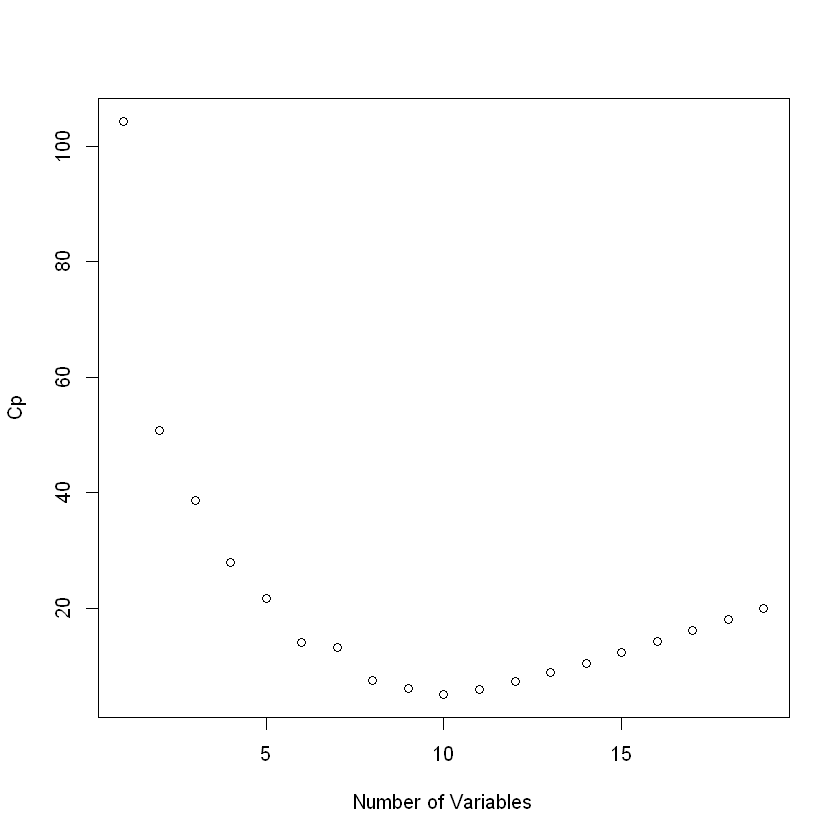

In [26]:
plot(reg.summary$cp,xlab="Number of Variables",ylab="Cp")

In [27]:
which.min(reg.summary$cp)

[1] 10

In [39]:
points(10,reg.summary$cp[10], col="red",cex=2,pch=20)

ERROR: Error in plot.xy(xy.coords(x, y), type = type, ...): plot.new has not been called yet


In [33]:
which.min(reg.summary$bic)

[1] 6

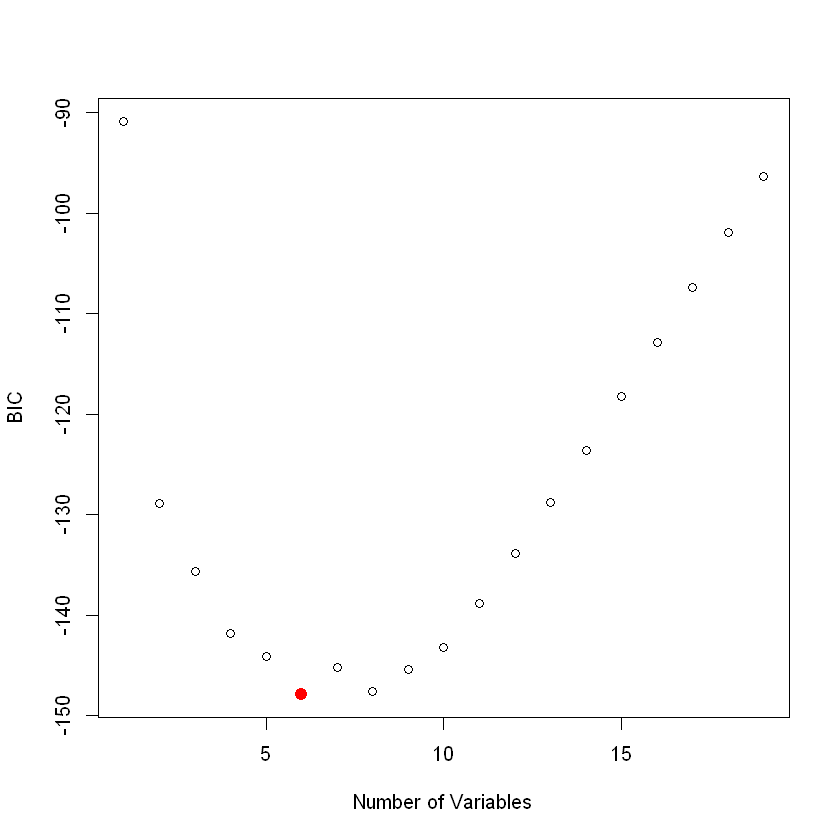

In [37]:
plot(reg.summary$bic,xlab="Number of Variables",ylab="BIC")
points(6,reg.summary$bic[6], col="red", cex=2,pch=20)

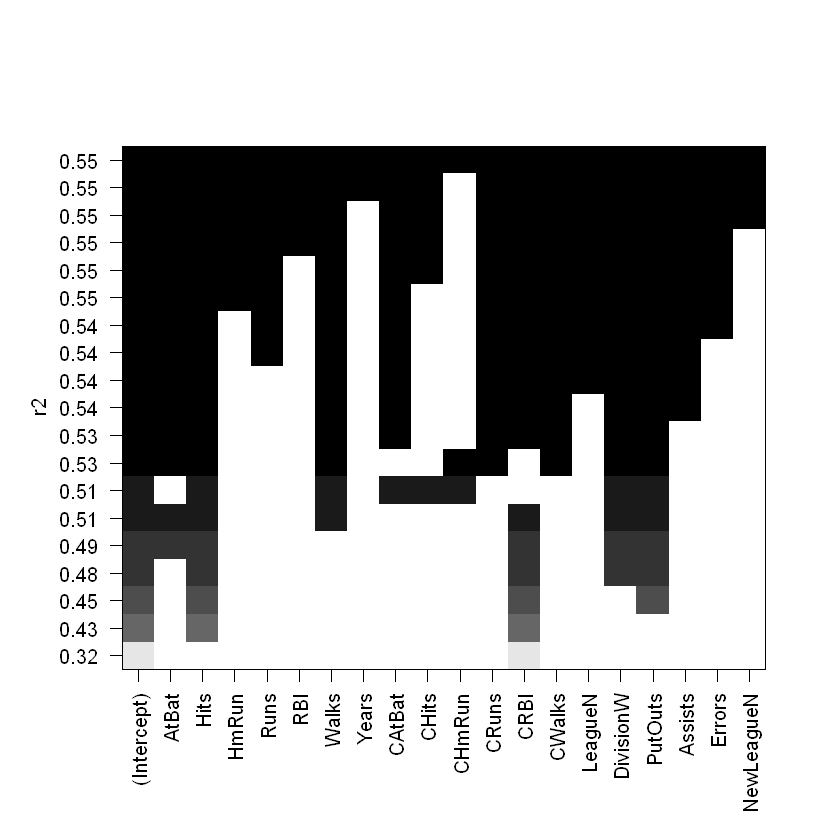

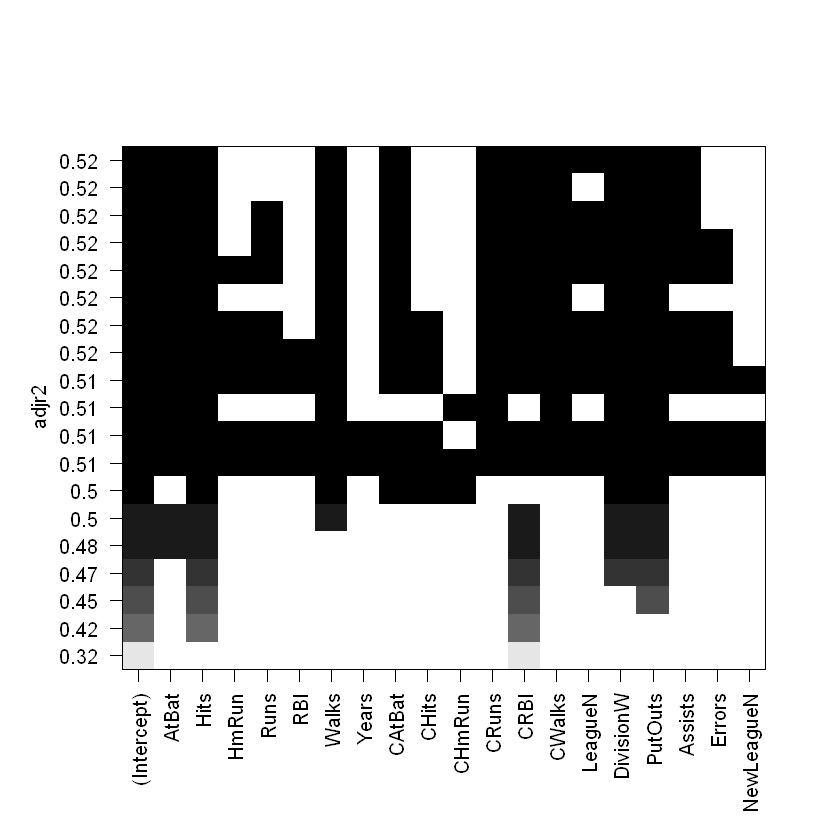

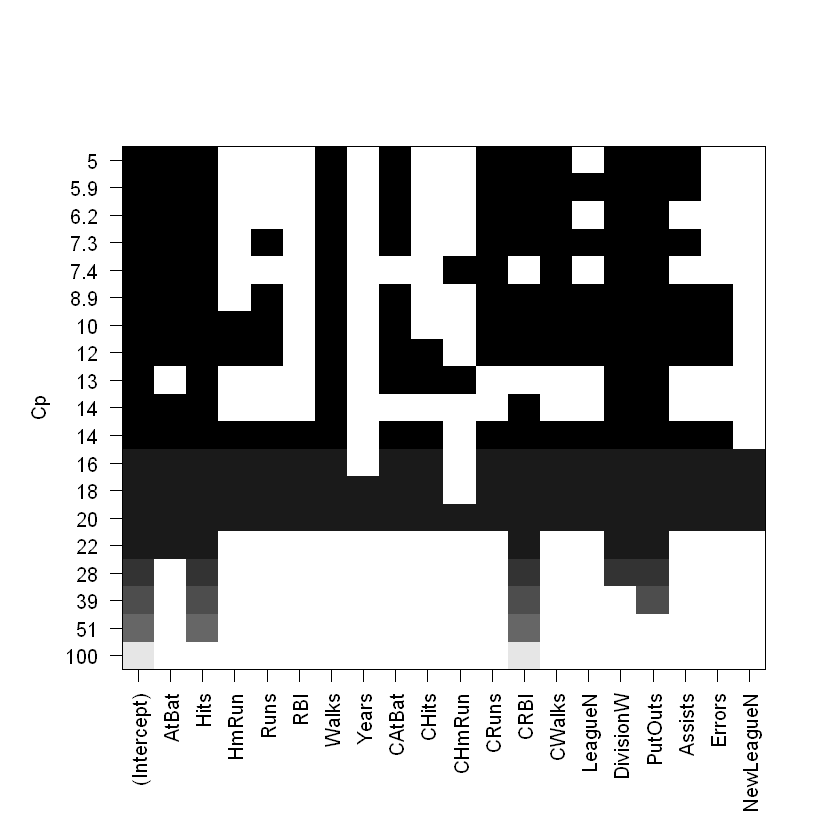

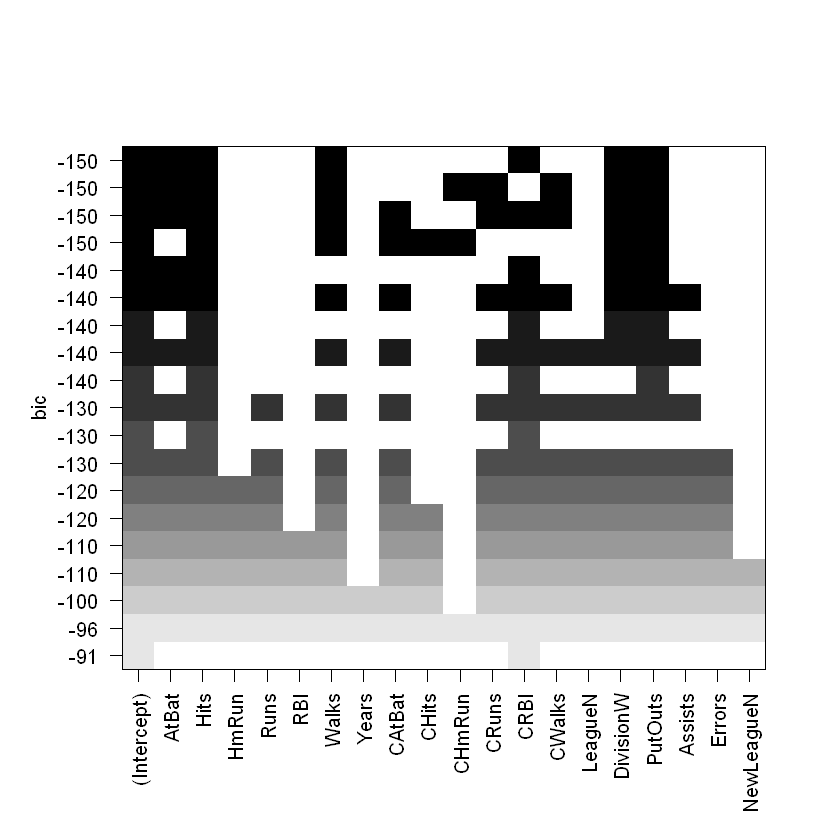

In [40]:
#regsubsets() function has built in plot() command
#useful plot when there are 10 or more models
plot(regfit.full ,scale="r2")
plot(regfit.full ,scale="adjr2")
plot(regfit.full ,scale="Cp")
plot(regfit.full ,scale="bic")

Top row of the plot contains black square for each variable. 
Note:Several models share a BIC close to 150. 
Modle with th lowest BIC contains 6 variables:

<b>AtBat, Hits, Walks, CRBI, DivisionW, PutOuts<b>

In [41]:
?plot.regsubsets

In [45]:
#coef() to see coefficient estimates associate with this model
coef(regfit.full,6)

(Intercept)        AtBat         Hits        Walks         CRBI    DivisionW 
  91.5117981   -1.8685892    7.6043976    3.6976468    0.6430169 -122.9515338 
     PutOuts 
   0.2643076

## Forward and Backward Stepwise Selection

In [47]:
#regsubsets() to perform forward or backward stepwise selection
#method="foward" or method="backward"
regfit.fwd=regsubsets(Salary~.,data=Hitters,nvmax=19,
method="forward")
summary(regfit.fwd)

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = Hitters, nvmax = 19, method = "forward")
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: forward
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2 

In [48]:
regfit.bwd=regsubsets(Salary~.,data=Hitters,nvmax=19,
                     method="backward")
summary(regfit.bwd)

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = Hitters, nvmax = 19, method = "backward")
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: backward
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    "*"   " " 


Best one variable model contains CRBI
Best two variable model includes HITS

Foward, Backward, and Best Subset are different at the 7 variable model

In [53]:
print("Best Subset")
coef(regfit.full,7)
print("Forward Stepwise")
coef(regfit.fwd,7)
print("Backward Stepwise")
coef(regfit.bwd,7)

[1] "Best Subset"


(Intercept)         Hits        Walks       CAtBat        CHits       CHmRun 
  79.4509472    1.2833513    3.2274264   -0.3752350    1.4957073    1.4420538 
   DivisionW      PutOuts 
-129.9866432    0.2366813

[1] "Forward Stepwise"


(Intercept)        AtBat         Hits        Walks         CRBI       CWalks 
 109.7873062   -1.9588851    7.4498772    4.9131401    0.8537622   -0.3053070 
   DivisionW      PutOuts 
-127.1223928    0.2533404

[1] "Backward Stepwise"


(Intercept)        AtBat         Hits        Walks        CRuns       CWalks 
 105.6487488   -1.9762838    6.7574914    6.0558691    1.1293095   -0.7163346 
   DivisionW      PutOuts 
-116.1692169    0.3028847

## Choosing Among Models  Using the Validation SEt Approach and Cross-Validation

In [54]:
set.seed(1)
train=sample(c(TRUE,FALSE), nrow(Hitters),rep=TRUE)
test=(!train)

In [55]:
regfit.best=regsubsets(Salary~.,data-Hitters[train,],
                      nvmax=19)

ERROR: Error in FUN(left, right): non-numeric argument to binary operator


In [65]:
test.mat=model.matrix(Salary~.,data=Hitters[test,])

In [66]:
val.errors=rep(NA,19)
for(i in 1:19){
    coefi=coef(regfit.best,id=i)
    pred=test.mat[,names(coefi)]%*%coefi
    val.errors[i]=mean((Hitters$Salary[test]-pred)^2)
}

ERROR: Error in coef(regfit.best, id = i): object 'regfit.best' not found


In [62]:
val.errors

[1] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA

In [63]:
which.min(val.errors)

integer(0)

In [64]:
coef(regfit.best,10)

ERROR: Error in coef(regfit.best, 10): object 'regfit.best' not found
